# High-level Goal

Our aim in this study is to find good candiates that one could use for expiration trading. 

1. Getting the minute-level data for the past 5 years from IB
2. getting the strikes from IB.
3. Getting the statistics from `Jeff Augen` book. 

Next, it is important to run the analysis and make sure the behavior of stocks is as one thought. For example

1. Statistics on strike crosses.
2. Statistics on minutes more than a \$1 away from any of the strikes.
3. Pinning statistics.
4. Best way to monetize this. 

#  Implementation of Expiration Trading Statistics

In [1]:
from IBPY import IB_PY
from Function_Expiration_Trading import expiration_stats, get_ivol_minutebar_from_ib, get_prices_minutebar_from_ib
import numpy as np
import pandas as pd
import datetime
import time
# ===================
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

### AAPL

In [2]:
# Testing the function
# defining the strikes
strikes1 = np.arange(100, 150.0, 5, dtype = np.double)
strikes2 = np.arange(150, 206.0, 2.5, dtype = np.double)
addendum = np.array([147, 148, 210], dtype = np.double)

strikes = np.concatenate((strikes1, strikes2, addendum))
strikes = np.unique(np.sort(strikes, axis = None))
# print strikes

In [3]:
#ticker = ['AAPL', 'TSLA', 'GS']
ticker = 'AAPL'
# Notice! This algo will fail if the time is not defined correctly
# The time has to be 16 of the friday and i minute in. 
last_friday = datetime.datetime(2018, 1, 5, 16, 1, 0) 
how_many_weeks = 2

In [4]:
stats = np.empty((0, 31))
for i in range(how_many_weeks):
    res = expiration_stats(ticker_=ticker, 
                           date_= last_friday, 
                           strikes_= strikes, 
                           ib_whatToShow_= 'MIDPOINT')
    stats = np.vstack((stats, np.array(res)))
    last_friday = last_friday - datetime.timedelta(days = 7)
    time.sleep(2)
# converting it to a dataframe
df_stats = pd.DataFrame(data = stats[:,1:], 
                        columns = ['total_strike_crosses', 'first_60', 'second_60', 'third_60', 'fourth_60', 
                                'fifth_60', 'sixth_60', 'final_30',
                                'unique_strike_crosses', 'unique_first_60', 'unique_second_60', 'unique_third_60', \
                                'unique_fourth_60', 'unique_fifth_60', 'unique_sixth_60', 'unique_final_30', \
                                'minutes_one_dollar_away_from_strike',
                                'high_low_over_close_percent', 'distance_strike_at_expiration', 'last_gap_between_strikes',
                                'open_price', 'close_price', \
                                'annual_var_first_60', 'annual_var_second_60', 'annual_var_third_60', \
                                'annual_var_fourth_60', 'annual_var_fifth_60', 'annual_var_sixth_60', \
                                'annual_var_final_30',
                                'total_number_minutes'],
                       index = stats[:,0])
df_stats.sort_index(axis=0, inplace=True)

Server Version: 76
TWS Time at connection:20180107 19:01:03 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

In [5]:
df_stats.head()

total_strike_crosses  first_60 second_60   third_60  \
2017-12-29 16:01:00                   31  0.354839         0  0.0322581   
2018-01-05 16:01:00                   21         0   0.47619          0   

                    fourth_60  fifth_60  sixth_60  final_30  \
2017-12-29 16:01:00         0  0.354839  0.258065         0   
2018-01-05 16:01:00         0  0.190476         0  0.333333   

                    unique_strike_crosses unique_first_60  \
2017-12-29 16:01:00                     1               1   
2018-01-05 16:01:00                     1               0   

                            ...          open_price close_price  \
2017-12-29 16:01:00         ...             170.445     169.295   
2018-01-05 16:01:00         ...             173.385     175.015   

                    annual_var_first_60 annual_var_second_60  \
2017-12-29 16:01:00         0.000378581          0.000142039   
2018-01-05 16:01:00         0.000622001          9.24834e-05   

                    annual_var_third_60 annual_var_fourth_60  \
2017-12-29 16:01:00         4.49575e-05          3.24294e-05   
2018-01-05 16:01:00         7.38379e-05          6.07246e-05   

                    annual_var_fifth_60 annual_var_sixth_60  \
2017-12-29 16:01:00         4.92123e-05         2.77133e-05   
2018-01-05 16:01:00         4.51037e-05         7.37343e-05   

                    annual_var_final_30 total_number_minutes  
2017-12-29 16:01:00         0.000506261                  391  
2018-01-05 16:01:00         0.000142662                  391  

[2 rows x 30 columns]

In [5]:
ivols = get_ivol_minutebar_from_ib(ticker_='AAPL', how_many_weeks_= 2, date_=last_friday)

Server Version: 76
TWS Time at connection:20171226 13:08:19 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

In [6]:
prices = get_prices_minutebar_from_ib(ticker_='AAPL', how_many_weeks_=2, date_=last_friday, whatToShow_='MIDPOINT')

Server Version: 76
TWS Time at connection:20171226 13:09:12 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

# Statistics

In [7]:
# Chances of ending up in the money per minute spent crossing a strike
float(df_stats.minutes_one_dollar_away_from_strike.sum())/df_stats.total_strike_crosses.sum()

0.6116504854368932

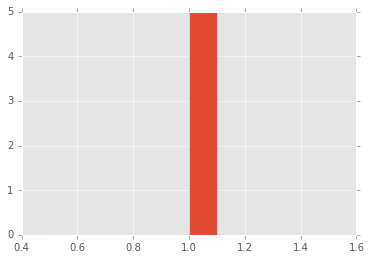

In [8]:
# distribution of unique strike crosses
df_stats.unique_strike_crosses.hist()

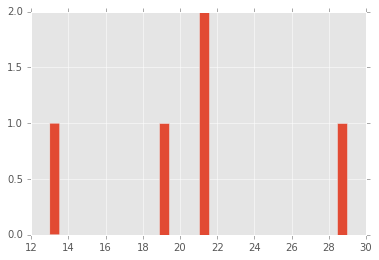

In [9]:
# Distribution of total strike crosses
df_stats.total_strike_crosses.hist(bins = 30)

In [51]:
df_stats.loc[:,['first_60', 'second_60', 'third_60', 'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].mean()

first_60     0.211956
second_60    0.096306
third_60     0.082081
fourth_60    0.084485
fifth_60     0.077753
sixth_60     0.065113
final_30     0.058776
dtype: float64

In [52]:
df_stats.loc[:,['first_60', 'second_60', 'third_60', 'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].median()

first_60     0.151515
second_60    0.000000
third_60     0.000000
fourth_60    0.000000
fifth_60     0.000000
sixth_60     0.000000
final_30     0.000000
dtype: float64

In [53]:
# Chances of ending up in the money per minute spent crossing a strike
# now with a condition
cond = df_stats.first_60 > 0
float(df_stats.loc[cond, 'minutes_one_dollar_away_from_strike'].sum())/df_stats.loc[:, 'total_strike_crosses'].sum()

1.4125

In [57]:
# Looking at high and low of the day
print df_stats.high_low_over_close_percent.mean(), df_stats.high_low_over_close_percent.median()
# so mostly it moves a little over one percent 

1.34200360849 1.13235909309


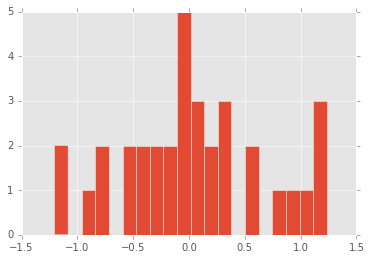

In [61]:
# Pinning actually occurs?
df_stats.distance_strike_at_expiration.hist(bins = 20)

In [65]:
float(np.sum(np.abs(df_stats.distance_strike_at_expiration) < 0.1))/np.sum(df_stats.last_gap_between_strikes == 2.5)

0.7692307692307693

In [66]:
# Oh my! AAPL is definitely pinned! less of a strike effect, mostly pinning effect. 

### TSLA

In [74]:
# Testing the function
# defining the strikes
strikes1 = np.arange(220, 300.0, 5, dtype = np.double)
strikes2 = np.arange(300, 400.0, 2.5, dtype = np.double)

strikes = np.concatenate((strikes1, strikes2))
strikes = np.unique(np.sort(strikes, axis = None))
# print strikes

In [73]:
#ticker = ['AAPL', 'TSLA', 'GS']
ticker = 'TSLA'
# Notice! This algo will fail if the time is not defined correctly
# The time has to be 16 of the friday and i minute in. 
last_friday = datetime.datetime(2017, 12, 22, 16, 1, 0) 
how_many_weeks = 52

In [75]:
stats = np.empty((0, 31))
for i in range(how_many_weeks):
    res = expiration_stats(ticker_=ticker, 
                           date_= last_friday, 
                           strikes_= strikes, 
                           ib_whatToShow_= 'MIDPOINT')
    stats = np.vstack((stats, np.array(res)))
    last_friday = last_friday - datetime.timedelta(days = 7)
    time.sleep(2)
# converting it to a dataframe
df_stats = pd.DataFrame(data = stats[:,1:], 
                        columns = ['total_strike_crosses', 'first_60', 'second_60', 'third_60', 'fourth_60', 
                                'fifth_60', 'sixth_60', 'final_30',
                                'unique_strike_crosses', 'unique_first_60', 'unique_second_60', 'unique_third_60', \
                                'unique_fourth_60', 'unique_fifth_60', 'unique_sixth_60', 'unique_final_30', \
                                'minutes_one_dollar_away_from_strike',
                                'high_low_over_close_percent', 'distance_strike_at_expiration', 'last_gap_between_strikes',
                                'open_price', 'close_price', \
                                'annual_var_first_60', 'annual_var_second_60', 'annual_var_third_60', \
                                'annual_var_fourth_60', 'annual_var_fifth_60', 'annual_var_sixth_60', \
                                'annual_var_final_30',
                                'total_number_minutes'],
                       index = stats[:,0])
df_stats.sort_index(axis=0, inplace=True)

Server Version: 76
TWS Time at connection:20171229 13:13:09 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

## Analysis

In [77]:
float(df_stats.minutes_one_dollar_away_from_strike.sum())/df_stats.total_strike_crosses.sum()

4.5360576923076925

In [78]:
float(df_stats.minutes_one_dollar_away_from_strike.median())/df_stats.total_strike_crosses.median()

2.6666666666666665

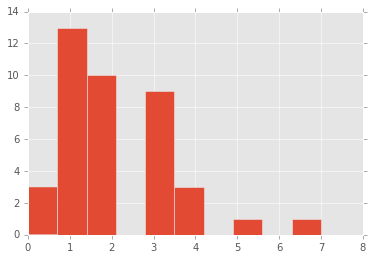

In [79]:
# distribution of unique strike crosses
df_stats.unique_strike_crosses.hist()

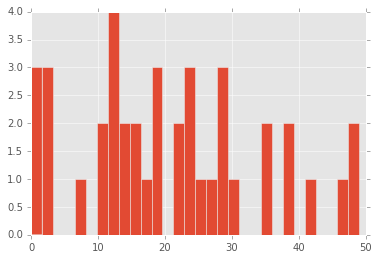

In [80]:
df_stats.total_strike_crosses.hist(bins = 30)

In [81]:
df_stats.loc[:,['first_60', 'second_60', 'third_60', 'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].mean()

first_60     0.256441
second_60    0.179165
third_60     0.109381
fourth_60    0.144858
fifth_60     0.089555
sixth_60     0.101227
final_30     0.044372
dtype: float64

In [83]:
df_stats.loc[:,['first_60', 'second_60', 'third_60', 'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].median()

first_60     0.240385
second_60    0.154762
third_60     0.072269
fourth_60    0.038981
fifth_60     0.044466
sixth_60     0.000000
final_30     0.000000
dtype: float64

In [84]:
# Chances of ending up in the money per minute spent crossing a strike
# now with a condition
cond = df_stats.first_60 > 0
float(df_stats.loc[cond, 'minutes_one_dollar_away_from_strike'].sum())/df_stats.loc[:, 'total_strike_crosses'].sum()

2.175480769230769

In [91]:
# Chances of ending up in the money per minute spent crossing a strike
# now with a condition
cond = (df_stats.first_60 > 0) & (df_stats.unique_strike_crosses == 1)
float(df_stats.loc[cond, 'minutes_one_dollar_away_from_strike'].sum())/df_stats.loc[:, 'total_strike_crosses'].sum()

0.9507211538461539

In [93]:
# Chances of ending up in the money per minute spent crossing a strike
# now with a condition
cond = (df_stats.first_60 > 0) & (df_stats.unique_strike_crosses == 1)
float(df_stats.loc[cond, 'minutes_one_dollar_away_from_strike'].median())/df_stats.loc[:, 'total_strike_crosses'].median()

2.2222222222222223

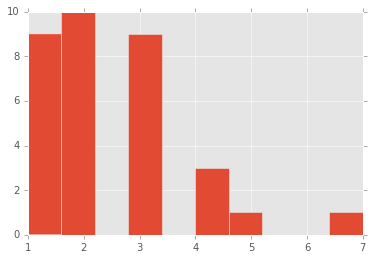

In [92]:
# Chances of ending up in the money per minute spent crossing a strike
# now with a condition
cond = (df_stats.first_60 > 0) 
df_stats.loc[cond, 'unique_strike_crosses'].hist()

In [85]:
# Looking at high and low of the day
print df_stats.high_low_over_close_percent.mean(), df_stats.high_low_over_close_percent.median()
# so mostly it moves a little over one percent 

2.27111749401 2.11107796296


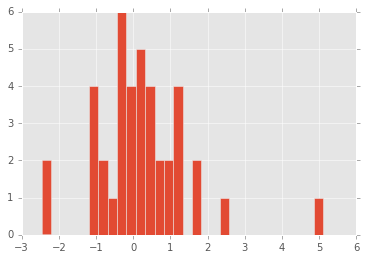

In [88]:
# Pinning actually occurs?
df_stats.distance_strike_at_expiration.hist(bins = 30)

In [89]:
float(np.sum(np.abs(df_stats.distance_strike_at_expiration) < 0.1))/np.sum(df_stats.last_gap_between_strikes == 2.5)

0.11538461538461539

In [90]:
float(np.sum(np.abs(df_stats.distance_strike_at_expiration) < 0.3))/np.sum(df_stats.last_gap_between_strikes == 2.5)

0.4230769230769231

# AMZN

In [5]:
# Testing the function
# defining the strikes
strikes1 = np.arange(940, 1060, 10, dtype = np.double)
strikes2 = np.arange(1060, 1305, 2.5, dtype = np.double)
strikes3 = np.arange(1310, 1410, 10, dtype = np.double)
addendum = np.array([900, 997.5, 1015, 1027.5, 1045, 1047.5, 1055], dtype = np.double)

strikes = np.concatenate((strikes1, strikes2, strikes3, addendum))
strikes = np.unique(np.sort(strikes, axis = None))
# print strikes

In [2]:
#ticker = ['AAPL', 'TSLA', 'GS']
ticker = 'AMZN'
# Notice! This algo will fail if the time is not defined correctly
# The time has to be 16 of the friday and i minute in. 
last_friday = datetime.datetime(2017, 12, 29, 16, 1, 0) 
how_many_weeks = 30

In [75]:
stats = np.empty((0, 31))
for i in range(how_many_weeks):
    res = expiration_stats(ticker_=ticker, 
                           date_= last_friday, 
                           strikes_= strikes, 
                           ib_whatToShow_= 'MIDPOINT')
    stats = np.vstack((stats, np.array(res)))
    last_friday = last_friday - datetime.timedelta(days = 7)
    time.sleep(2)
# converting it to a dataframe
df_stats = pd.DataFrame(data = stats[:,1:], 
                        columns = ['total_strike_crosses', 'first_60', 'second_60', 'third_60', 'fourth_60', 
                                'fifth_60', 'sixth_60', 'final_30',
                                'unique_strike_crosses', 'unique_first_60', 'unique_second_60', 'unique_third_60', \
                                'unique_fourth_60', 'unique_fifth_60', 'unique_sixth_60', 'unique_final_30', \
                                'minutes_one_dollar_away_from_strike',
                                'high_low_over_close_percent', 'distance_strike_at_expiration', 'last_gap_between_strikes',
                                'open_price', 'close_price', \
                                'annual_var_first_60', 'annual_var_second_60', 'annual_var_third_60', \
                                'annual_var_fourth_60', 'annual_var_fifth_60', 'annual_var_sixth_60', \
                                'annual_var_final_30',
                                'total_number_minutes'],
                       index = stats[:,0])
df_stats.sort_index(axis=0, inplace=True)

Server Version: 76
TWS Time at connection:20180104 23:21:26 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

## Analysis

In [76]:
float(df_stats.minutes_one_dollar_away_from_strike.sum())/df_stats.total_strike_crosses.sum()

7.373819163292848

In [77]:
float(df_stats.minutes_one_dollar_away_from_strike.median())/df_stats.total_strike_crosses.median()

10.952380952380953

In [3]:
# one check before we dig in deeper
amzn = get_prices_minutebar_from_ib(date_=datetime.datetime(2017, 12, 29, 16, 1, 0), 
                                    ticker_='AMZN', 
                                    whatToShow_='MIDPOINT', 
                                    how_many_weeks_=10)

Server Version: 76
TWS Time at connection:20180105 10:22:15 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

In [29]:
strikes

array([  900. ,   940. ,   950. ,   960. ,   970. ,   980. ,   990. ,
         997.5,  1000. ,  1010. ,  1015. ,  1020. ,  1027.5,  1030. ,
        1040. ,  1045. ,  1047.5,  1050. ,  1055. ,  1060. ,  1062.5,
        1065. ,  1067.5,  1070. ,  1072.5,  1075. ,  1077.5,  1080. ,
        1082.5,  1085. ,  1087.5,  1090. ,  1092.5,  1095. ,  1097.5,
        1100. ,  1102.5,  1105. ,  1107.5,  1110. ,  1112.5,  1115. ,
        1117.5,  1120. ,  1122.5,  1125. ,  1127.5,  1130. ,  1132.5,
        1135. ,  1137.5,  1140. ,  1142.5,  1145. ,  1147.5,  1150. ,
        1152.5,  1155. ,  1157.5,  1160. ,  1162.5,  1165. ,  1167.5,
        1170. ,  1172.5,  1175. ,  1177.5,  1180. ,  1182.5,  1185. ,
        1187.5,  1190. ,  1192.5,  1195. ,  1197.5,  1200. ,  1202.5,
        1205. ,  1207.5,  1210. ,  1212.5,  1215. ,  1217.5,  1220. ,
        1222.5,  1225. ,  1227.5,  1230. ,  1232.5,  1235. ,  1237.5,
        1240. ,  1242.5,  1245. ,  1247.5,  1250. ,  1252.5,  1255. ,
        1257.5,  126

In [15]:
ind = 6
print amzn.keys()[ind] 
# amzn.values()[ind].plot(figsize = (20, 10))
print amzn.values()[ind]

2017-11-10 16:01:00
          close
time           
09:30  1130.075
09:31  1130.210
09:32  1129.625
09:33  1130.675
09:34  1129.255
09:35  1129.720
09:36  1129.800
09:37  1129.525
09:38  1130.060
09:39  1129.975
09:40  1129.210
09:41  1129.645
09:42  1129.750
09:43  1128.795
09:44  1128.775
09:45  1129.130
09:46  1129.025
09:47  1129.175
09:48  1129.640
09:49  1129.390
09:50  1130.420
09:51  1130.055
09:52  1129.950
09:53  1129.540
09:54  1130.125
09:55  1130.800
09:56  1130.130
09:57  1129.895
09:58  1130.345
09:59  1129.700
10:00  1129.750
10:01  1129.340
10:02  1128.705
10:03  1127.895
10:04  1127.965
10:05  1127.005
10:06  1127.335
10:07  1126.495
10:08  1128.005
10:09  1126.860
10:10  1127.210
10:11  1126.990
10:12  1126.900
10:13  1126.540
10:14  1126.550
10:15  1125.745
10:16  1126.625
10:17  1127.200
10:18  1126.910
10:19  1126.130
10:20  1126.650
10:21  1125.725
10:22  1126.320
10:23  1125.915
10:24  1125.735
10:25  1125.430
10:26  1124.775
10:27  1124.825
10:28  1125.315
10:2

In [30]:
ivol_amzn = get_ivol_minutebar_from_ib(date_=datetime.datetime(2017, 12, 29, 16, 1, 0), how_many_weeks_=1, ticker_='AMZN')

Server Version: 76
TWS Time at connection:20180104 22:34:27 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

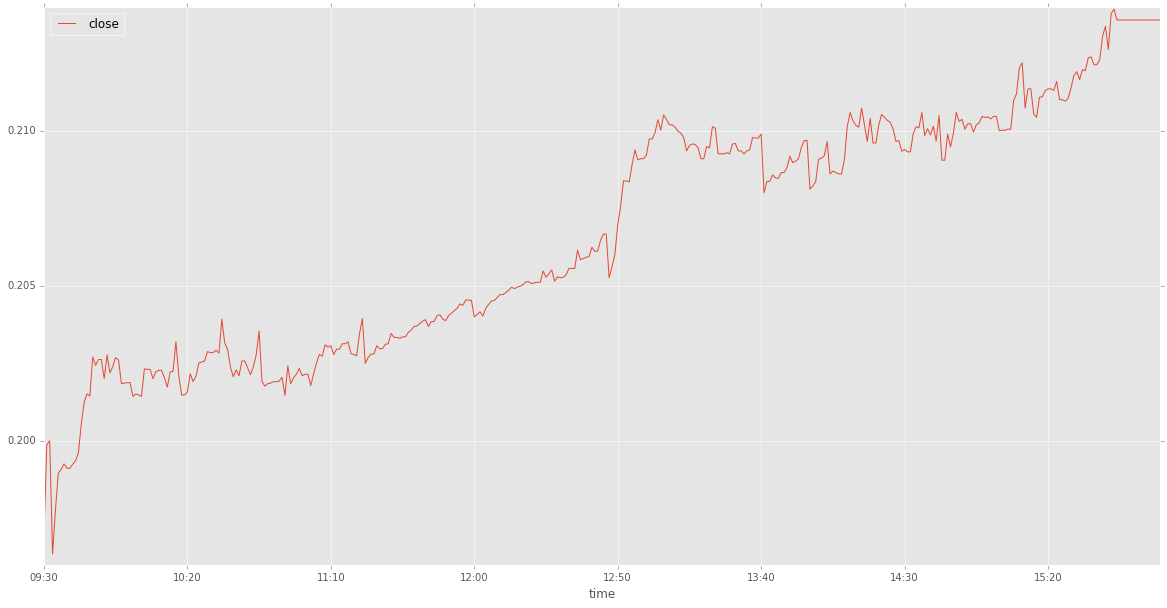

In [32]:
ivol_amzn.values()[0].plot(figsize = (20, 10))

ok the data is correct. Moving on with the analysis.

Amazon is a very interesting case. The stock on paper does not spend a lot in the money, because it moves to a very different strike very fast! couple of checks

1. Median number of unique strikes it crosses. 
2. Median minutes away from a strike.
3. Median strike crosses over Median unique strike crosses.

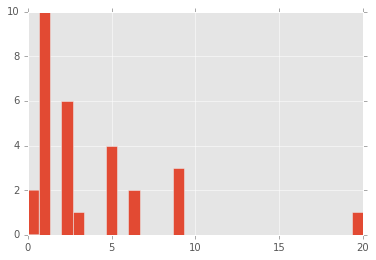

In [78]:
# distribution of unique strike crosses
df_stats.unique_strike_crosses.hist(bins = 30)

In [79]:
print df_stats.unique_strike_crosses.median()

2.0


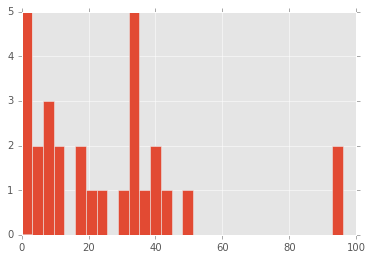

In [80]:
df_stats.total_strike_crosses.hist(bins = 30)

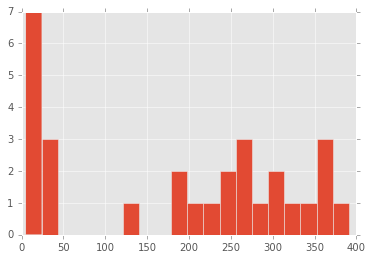

In [81]:
df_stats.minutes_one_dollar_away_from_strike.hist(bins = 20)

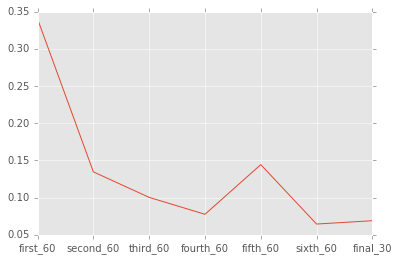

In [82]:
df_stats.loc[:,['first_60', 'second_60', 'third_60', 'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].mean().plot()

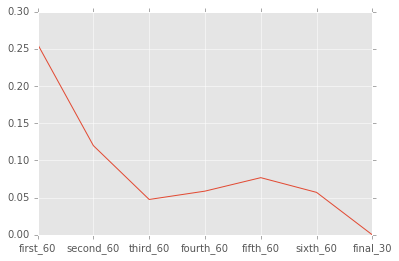

In [83]:
df_stats.loc[:,['first_60', 'second_60', 'third_60', 'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].median().plot()

In [65]:
df_stats.unique_strike_crosses

2017-10-27 16:01:00    20
2017-11-03 16:01:00     9
2017-11-10 16:01:00     3
2017-11-17 16:01:00     5
2017-11-24 16:01:00     9
2017-12-01 16:01:00     9
2017-12-08 16:01:00     5
2017-12-15 16:01:00     5
2017-12-22 16:01:00     2
2017-12-29 16:01:00     6
Name: unique_strike_crosses, dtype: object

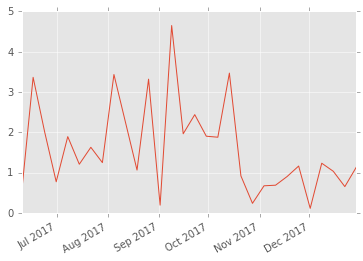

In [84]:
df_stats.distance_strike_at_expiration.abs().plot()

In [85]:
df_stats.distance_strike_at_expiration.abs().mean()

1.5770689655172458

In [86]:
df_stats.distance_strike_at_expiration.abs().median()

1.2100000000000364

Amazon is a great stock for long straddle trades. I see very little evidence of pinning. Strong strike evidence. the stock spends most of its time crushing into new strikes. I would of course need more data here. It is sort of tricky to go further back because of strike issues. 

After trading the stock for a long straddle on Jan 5th. 
------------------
My observation is that 

1. The implied vol collapses, so the position becomes less valuable.
2. (1) Happens even if the stock has moved in either direction.
3. Around noon, implied vol becomes stable. Then the profits come. 
4. If the underlying is about one or two strikes away from the original strike, then one option is in the money and the other is not worth anything. Because of the asymmetric behavior of options, we should see profits.
5. As time goes by and the stock stays out of the original strike, the contract that is in the money becomes more and more valuable. 

Strategy
------------------
1. 9.30 - 9.45 observe the stock.
2. If it passes a strike, buy a straddle. 
        a. If the stock is on the move hold on to the straddle until 3.45. 
        b. If the stock gets pinned, sell the contract for a loss and take an opposite position.
3. Ideally 3 contracts. It is a good position size. The straddles were trading for $600. 


# GOOG

In [2]:
# Testing the function
# defining the strikes
strikes1 = np.arange(860, 910, 10, dtype = np.double)
strikes2 = np.arange(1015, 1152.5, 2.5, dtype = np.double)
addendum = np.array([1155, 1170, 1185, 1190, 1195, 1200, 920, 935, 950, 960, \
                     972.5, 980, 982.5, 990, 995, 997.5, 1000, 1005, 1007.5,\
                    1010], dtype = np.double)

strikes = np.concatenate((strikes1, strikes2, addendum))
strikes = np.unique(np.sort(strikes, axis = None))
print strikes

[  860.    870.    880.    890.    900.    920.    935.    950.    960.
   972.5   980.    982.5   990.    995.    997.5  1000.   1005.   1007.5
  1010.   1015.   1017.5  1020.   1022.5  1025.   1027.5  1030.   1032.5
  1035.   1037.5  1040.   1042.5  1045.   1047.5  1050.   1052.5  1055.
  1057.5  1060.   1062.5  1065.   1067.5  1070.   1072.5  1075.   1077.5
  1080.   1082.5  1085.   1087.5  1090.   1092.5  1095.   1097.5  1100.
  1102.5  1105.   1107.5  1110.   1112.5  1115.   1117.5  1120.   1122.5
  1125.   1127.5  1130.   1132.5  1135.   1137.5  1140.   1142.5  1145.
  1147.5  1150.   1155.   1170.   1185.   1190.   1195.   1200. ]


In [3]:
ticker = 'GOOG'
# Notice! This algo will fail if the time is not defined correctly
# The time has to be 16 of the friday and i minute in. 
last_friday = datetime.datetime(2018, 1, 5, 16, 1, 0) 
how_many_weeks = 11

In [4]:
stats = np.empty((0, 31))
for i in range(how_many_weeks):
    res = expiration_stats(ticker_=ticker, 
                           date_= last_friday, 
                           strikes_= strikes, 
                           ib_whatToShow_= 'MIDPOINT')
    stats = np.vstack((stats, np.array(res)))
    last_friday = last_friday - datetime.timedelta(days = 7)
    time.sleep(2)
# converting it to a dataframe
df_stats = pd.DataFrame(data = stats[:,1:], 
                        columns = ['total_strike_crosses', 'first_60', 'second_60', 'third_60', 'fourth_60', 
                                'fifth_60', 'sixth_60', 'final_30',
                                'unique_strike_crosses', 'unique_first_60', 'unique_second_60', 'unique_third_60', \
                                'unique_fourth_60', 'unique_fifth_60', 'unique_sixth_60', 'unique_final_30', \
                                'minutes_one_dollar_away_from_strike',
                                'high_low_over_close_percent', 'distance_strike_at_expiration', 'last_gap_between_strikes',
                                'open_price', 'close_price', \
                                'annual_var_first_60', 'annual_var_second_60', 'annual_var_third_60', \
                                'annual_var_fourth_60', 'annual_var_fifth_60', 'annual_var_sixth_60', \
                                'annual_var_final_30',
                                'total_number_minutes'],
                       index = stats[:,0])
df_stats.sort_index(axis=0, inplace=True)

Server Version: 14
 - Nothing Stored, Query came back empty - 
('Disconnected', False)
DataFrame had an unusual size
Server Version: 76
TWS Time at connection:20180105 19:46:43 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handl

In [8]:
print df_stats

                    total_strike_crosses  first_60  second_60   third_60  \
2017-10-27 16:01:00                   90  0.288889   0.222222        0.1   
2017-11-03 16:01:00                   33  0.181818  0.0606061   0.181818   
2017-11-10 16:01:00                   32      0.25    0.09375    0.15625   
2017-11-17 16:01:00                   36  0.277778       0.25  0.0833333   
2017-11-24 16:01:00                   31  0.354839   0.225806  0.0645161   
2017-12-01 16:01:00                   62   0.16129   0.193548   0.241935   
2017-12-08 16:01:00                   57   0.22807   0.105263   0.140351   
2017-12-15 16:01:00                   37  0.432432   0.162162   0.189189   
2017-12-22 16:01:00                   32    0.1875          0     0.1875   
2017-12-29 16:01:00                   21  0.380952   0.047619   0.380952   
NaT                                  NaN       NaN        NaN        NaN   

                     fourth_60   fifth_60   sixth_60   final_30  \
2017-10-27 16:01:00 

In [9]:
# one check before we dig in deeper
goog = get_prices_minutebar_from_ib(date_=datetime.datetime(2017, 12, 29, 16, 1, 0), 
                                    ticker_='GOOG', 
                                    whatToShow_='MIDPOINT', 
                                    how_many_weeks_=10)

Server Version: 76
TWS Time at connection:20180105 21:06:30 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

2017-12-01 16:01:00


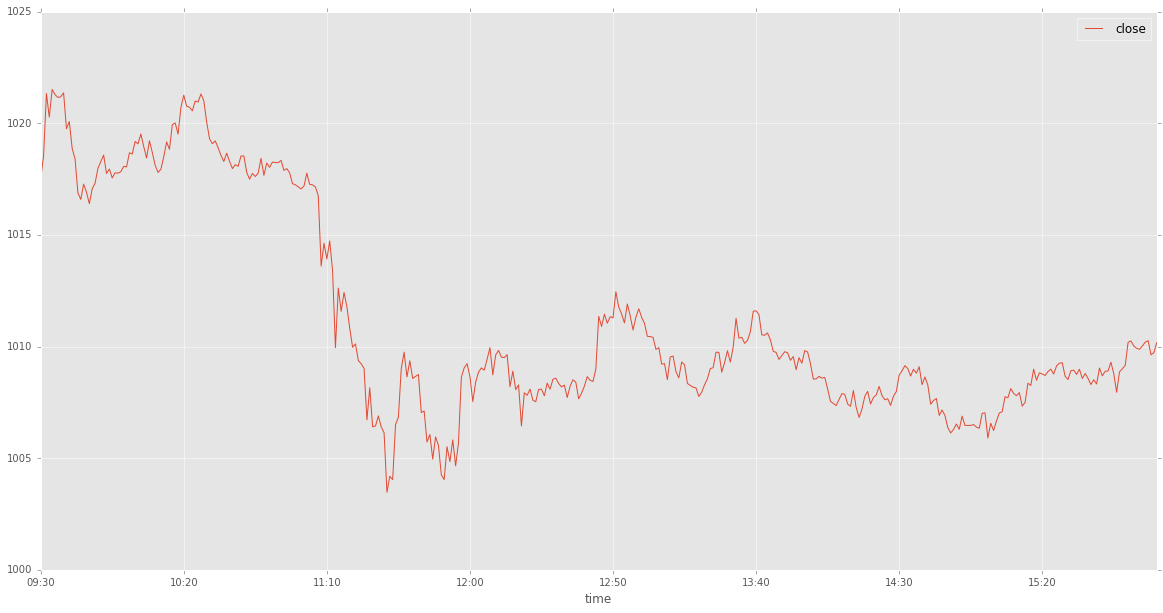

In [10]:
ind = 0
print goog.keys()[ind]
goog.values()[ind].plot(figsize = (20, 10))

## Analysis

In [11]:
float(df_stats.minutes_one_dollar_away_from_strike.sum())/df_stats.total_strike_crosses.sum()

0.46403712296983757

In [12]:
float(df_stats.minutes_one_dollar_away_from_strike.median())/df_stats.total_strike_crosses.median()

0.5797101449275363

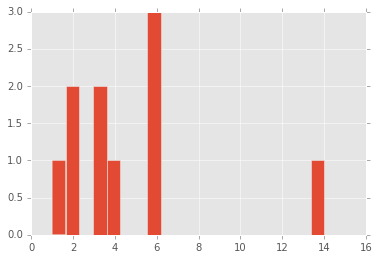

In [15]:
df_stats.unique_strike_crosses.hist(bins = 20)

In [16]:
df_stats.unique_strike_crosses.median()

3.5

In [17]:
print df_stats.unique_strike_crosses

2017-10-27 16:01:00     14
2017-11-03 16:01:00      4
2017-11-10 16:01:00      2
2017-11-17 16:01:00      6
2017-11-24 16:01:00      3
2017-12-01 16:01:00      6
2017-12-08 16:01:00      3
2017-12-15 16:01:00      6
2017-12-22 16:01:00      2
2017-12-29 16:01:00      1
NaT                    NaN
Name: unique_strike_crosses, dtype: object


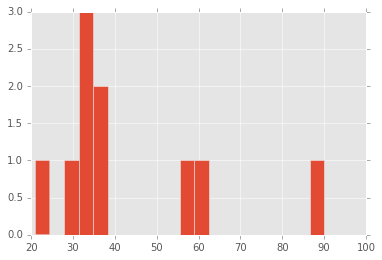

In [19]:
df_stats.total_strike_crosses.hist(bins = 20)

In [21]:
df_stats.unique_strike_crosses/df_stats.total_strike_crosses

2017-10-27 16:01:00     0.155556
2017-11-03 16:01:00     0.121212
2017-11-10 16:01:00       0.0625
2017-11-17 16:01:00     0.166667
2017-11-24 16:01:00    0.0967742
2017-12-01 16:01:00    0.0967742
2017-12-08 16:01:00    0.0526316
2017-12-15 16:01:00     0.162162
2017-12-22 16:01:00       0.0625
2017-12-29 16:01:00     0.047619
NaT                          NaN
dtype: object

In [24]:
df_stats.high_low_over_close_percent.mean()

1.3362812245947853

In [25]:
df_stats.high_low_over_close_percent.median()

1.0473418296052286

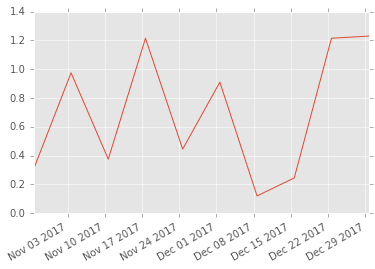

In [27]:
df_stats.distance_strike_at_expiration.abs().plot()

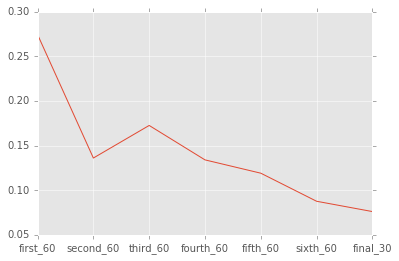

In [28]:
df_stats.loc[:,['first_60', 'second_60', 'third_60', 'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].mean().plot()

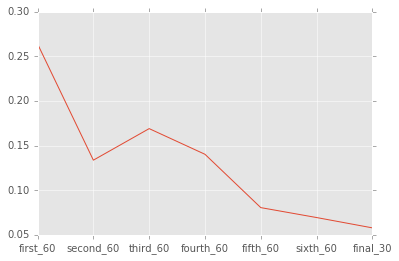

In [29]:
df_stats.loc[:,['first_60', 'second_60', 'third_60', 'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].median().plot()

2017-11-17 16:01:00


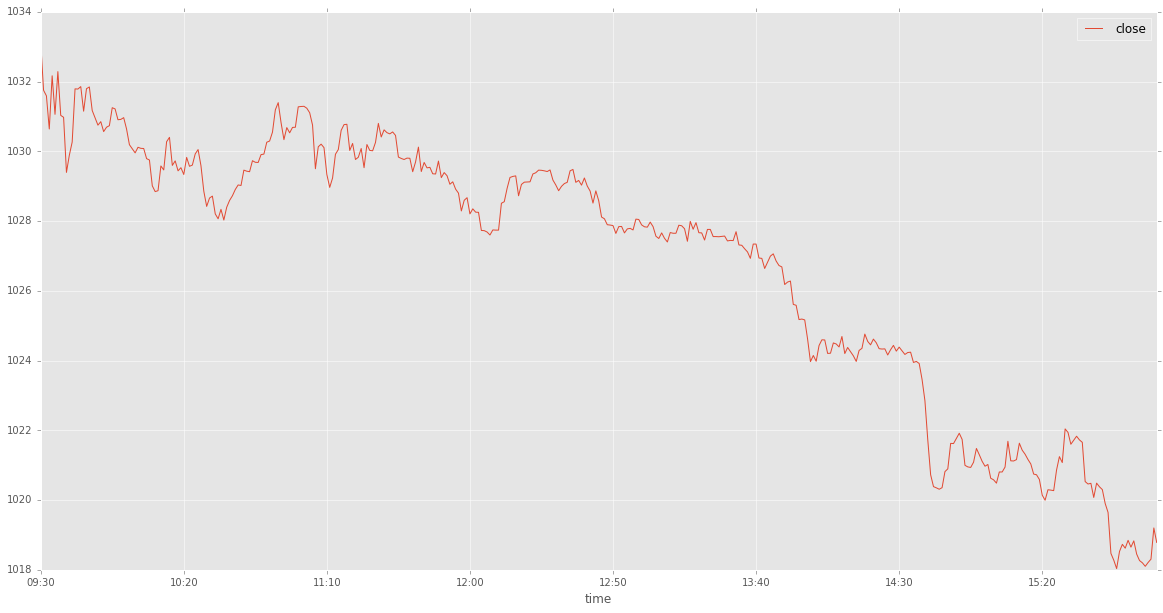

In [42]:
ind = 9
print goog.keys()[ind]
#print goog.values()[ind]
goog.values()[ind].plot(figsize = (20, 10))

The first thing I noticed is that `GOOG` apparently gets pinned more than `AMZN`. But it does show the very similar behavior. They have very high unique number of strike crosses. I think smaller position (1-2 contract) with the same strategy is profitable. If it does get pinned, maybe a little later in the day one should sell options. 

# GOOGL

In [6]:
# Testing the function
# defining the strikes
strikes1 = np.arange(1020, 1162.5, 2.5, dtype = np.double)
addendum = np.array([870, 880, 905, 960, 970,980, 985, 995, \
                     1000, 1007.5, 1010, 1012.5, \
                     1170.0, 1175, 1180, 1182.5, 1200, 1210, 1230, 1240], dtype = np.double)
# Need to delete 1077.5, 1082.5
ind1 = np.argwhere(strikes1 == 1077.5)
ind2 = np.argwhere(strikes1 == 1082.5)
strikes2 = np.delete(strikes1, [ind1, ind2])
#
strikes = np.concatenate((strikes2, addendum))
strikes = np.unique(np.sort(strikes, axis = None))
print strikes

[  870.    880.    905.    960.    970.    980.    985.    995.   1000.
  1007.5  1010.   1012.5  1020.   1022.5  1025.   1027.5  1030.   1032.5
  1035.   1037.5  1040.   1042.5  1045.   1047.5  1050.   1052.5  1055.
  1057.5  1060.   1062.5  1065.   1067.5  1070.   1072.5  1075.   1080.
  1085.   1087.5  1090.   1092.5  1095.   1097.5  1100.   1102.5  1105.
  1107.5  1110.   1112.5  1115.   1117.5  1120.   1122.5  1125.   1127.5
  1130.   1132.5  1135.   1137.5  1140.   1142.5  1145.   1147.5  1150.
  1152.5  1155.   1157.5  1160.   1170.   1175.   1180.   1182.5  1200.
  1210.   1230.   1240. ]


In [7]:
ticker = 'GOOGL'
# Notice! This algo will fail if the time is not defined correctly
# The time has to be 16 of the friday and i minute in. 
last_friday = datetime.datetime(2018, 1, 5, 16, 1, 0) 
how_many_weeks = 12

In [8]:
stats = np.empty((0, 31))
for i in range(how_many_weeks):
    res = expiration_stats(ticker_=ticker, 
                           date_= last_friday, 
                           strikes_= strikes, 
                           ib_whatToShow_= 'MIDPOINT')
    stats = np.vstack((stats, np.array(res)))
    last_friday = last_friday - datetime.timedelta(days = 7)
    time.sleep(2)
# converting it to a dataframe
df_stats = pd.DataFrame(data = stats[:,1:], 
                        columns = ['total_strike_crosses', 'first_60', 'second_60', 'third_60', 'fourth_60', 
                                'fifth_60', 'sixth_60', 'final_30',
                                'unique_strike_crosses', 'unique_first_60', 'unique_second_60', 'unique_third_60', \
                                'unique_fourth_60', 'unique_fifth_60', 'unique_sixth_60', 'unique_final_30', \
                                'minutes_one_dollar_away_from_strike',
                                'high_low_over_close_percent', 'distance_strike_at_expiration', 'last_gap_between_strikes',
                                'open_price', 'close_price', \
                                'annual_var_first_60', 'annual_var_second_60', 'annual_var_third_60', \
                                'annual_var_fourth_60', 'annual_var_fifth_60', 'annual_var_sixth_60', \
                                'annual_var_final_30',
                                'total_number_minutes'],
                       index = stats[:,0])
df_stats.sort_index(axis=0, inplace=True)

Server Version: 76
TWS Time at connection:20180107 19:04:18 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

## Analysis

In [9]:
float(df_stats.minutes_one_dollar_away_from_strike.sum())/df_stats.total_strike_crosses.sum()

1.3603411513859276

In [10]:
float(df_stats.minutes_one_dollar_away_from_strike.median())/df_stats.total_strike_crosses.median()

0.6865671641791045

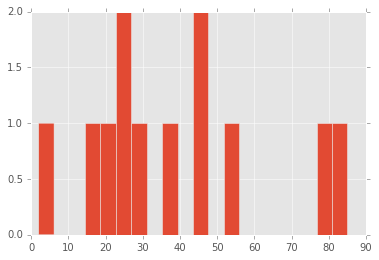

In [11]:
df_stats.total_strike_crosses.hist(bins = 20)

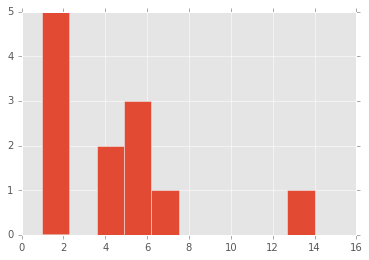

In [12]:
df_stats.unique_strike_crosses.hist()

In [13]:
df_stats.total_strike_crosses.median()/df_stats.unique_strike_crosses.median()

8.375

In [14]:
float(df_stats.total_strike_crosses.sum())/df_stats.unique_strike_crosses.sum()

8.685185185185185

In [15]:
print df_stats.high_low_over_close_percent.mean(), df_stats.high_low_over_close_percent.median()

1.2629762178 1.15977521003


Axes(0.125,0.125;0.775x0.775)


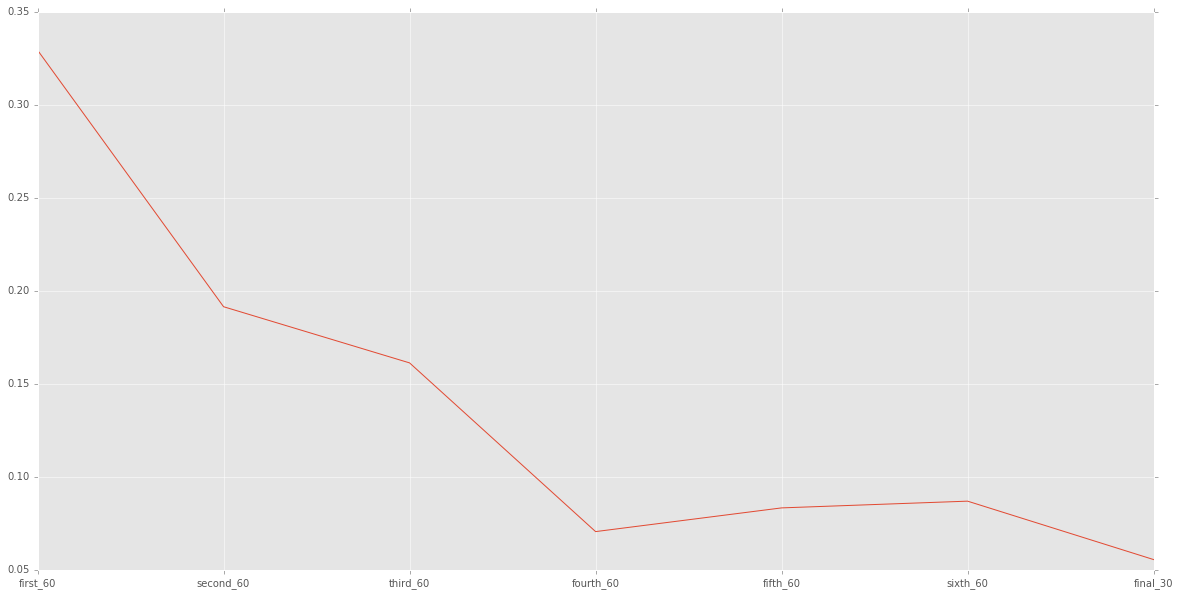

In [23]:
print df_stats.loc[:,['first_60', 'second_60', 'third_60', \
                                'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].median(axis = 0).plot(figsize = (20, 10))

Axes(0.125,0.125;0.775x0.775)


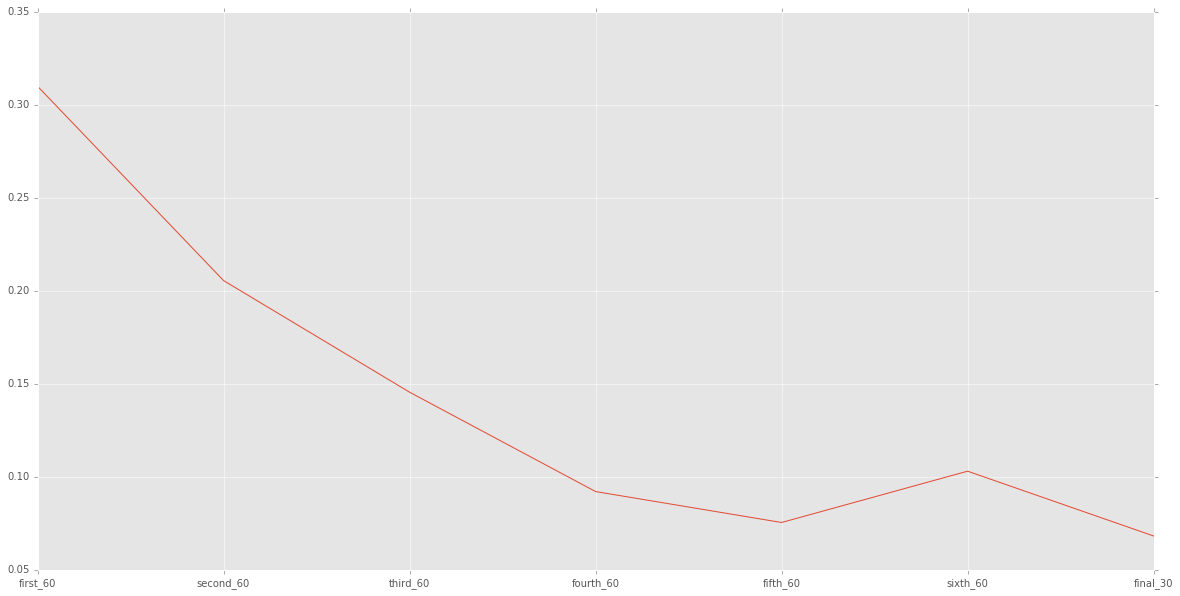

In [24]:
print df_stats.loc[:,['first_60', 'second_60', 'third_60', \
                                'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].mean(axis = 0).plot(figsize = (20, 10))

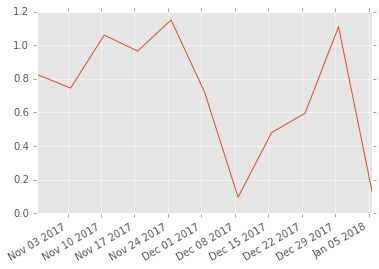

In [28]:
# Is there evidence of pinning?
df_stats.distance_strike_at_expiration.abs().plot()

Axes(0.125,0.125;0.775x0.775)


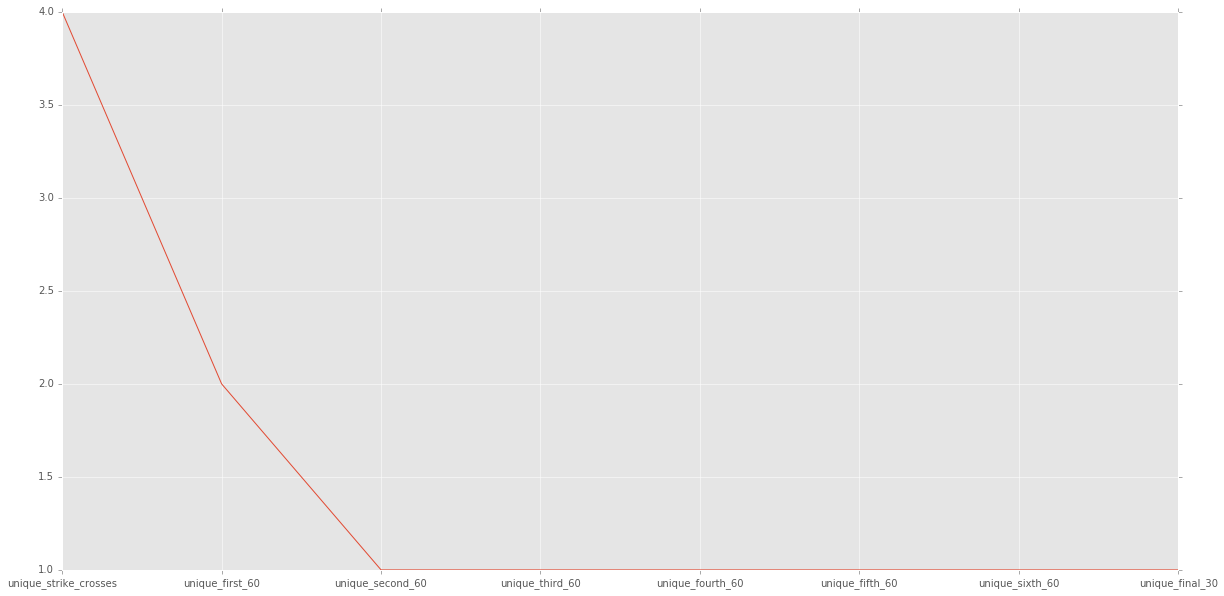

In [14]:
print df_stats.loc[:,['unique_strike_crosses', 'unique_first_60', 'unique_second_60', 'unique_third_60', \
                                'unique_fourth_60', 'unique_fifth_60', 'unique_sixth_60', 'unique_final_30']].median(axis = 0).plot(figsize = (20, 10))

Axes(0.125,0.125;0.775x0.775)


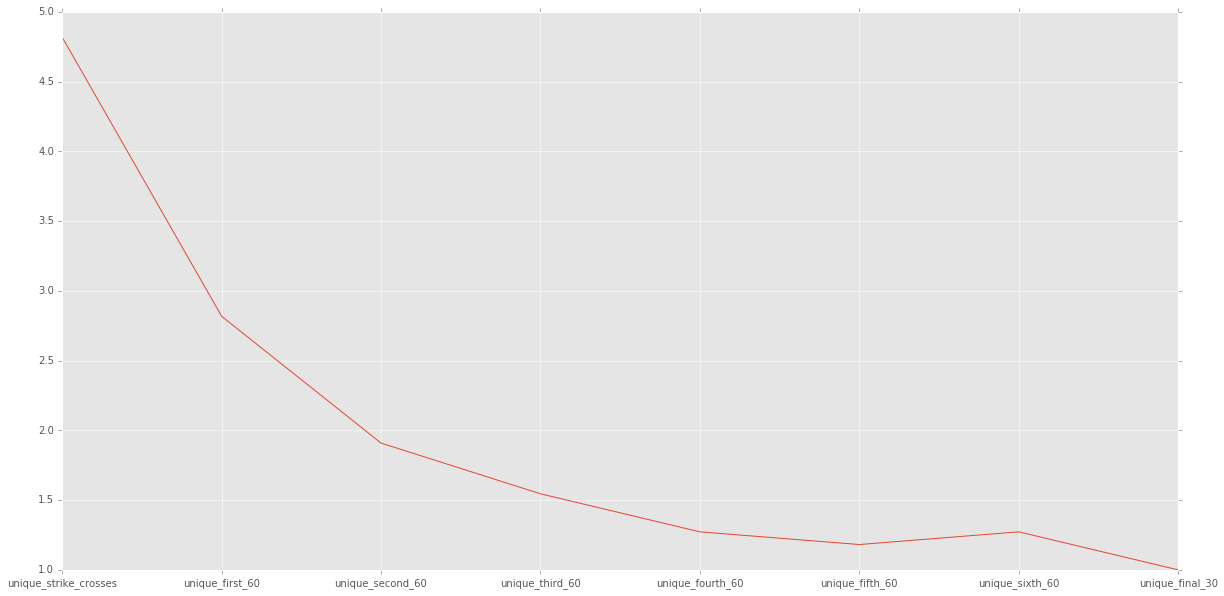

In [15]:
print df_stats.loc[:,['unique_strike_crosses', 'unique_first_60', 'unique_second_60', 'unique_third_60', \
                                'unique_fourth_60', 'unique_fifth_60', 'unique_sixth_60', 'unique_final_30']].mean(axis = 0).plot(figsize = (20, 10))

In [9]:
float(df_stats.minutes_one_dollar_away_from_strike.sum())/df_stats.total_strike_crosses.sum()

0.7408993576017131

In [10]:
float(df_stats.minutes_one_dollar_away_from_strike.median())/df_stats.total_strike_crosses.median()

0.5277777777777778

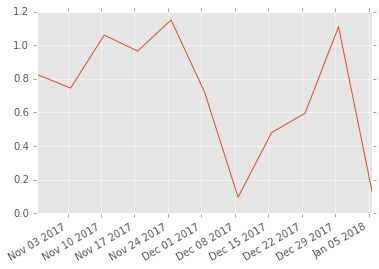

In [11]:
df_stats.distance_strike_at_expiration.abs().plot()

In [15]:
print df_stats.total_strike_crosses, df_stats.unique_strike_crosses

2017-10-27 16:01:00    85
2017-11-03 16:01:00    55
2017-11-10 16:01:00    26
2017-11-17 16:01:00    47
2017-11-24 16:01:00    23
2017-12-01 16:01:00    80
2017-12-08 16:01:00    47
2017-12-15 16:01:00    36
2017-12-22 16:01:00    18
2017-12-29 16:01:00    31
2018-01-05 16:01:00    19
Name: total_strike_crosses, dtype: object 2017-10-27 16:01:00    14
2017-11-03 16:01:00     5
2017-11-10 16:01:00     2
2017-11-17 16:01:00     6
2017-11-24 16:01:00     2
2017-12-01 16:01:00     7
2017-12-08 16:01:00     4
2017-12-15 16:01:00     6
2017-12-22 16:01:00     1
2017-12-29 16:01:00     2
2018-01-05 16:01:00     4
Name: unique_strike_crosses, dtype: object


In [18]:
(df_stats.minutes_one_dollar_away_from_strike/df_stats.total_strike_crosses) * df_stats.unique_strike_crosses

2017-10-27 16:01:00    1.48235
2017-11-03 16:01:00    1.36364
2017-11-10 16:01:00    2.84615
2017-11-17 16:01:00    2.42553
2017-11-24 16:01:00    10.7826
2017-12-01 16:01:00     0.4375
2017-12-08 16:01:00    1.10638
2017-12-15 16:01:00    1.16667
2017-12-22 16:01:00          3
2017-12-29 16:01:00    1.74194
2018-01-05 16:01:00    7.57895
dtype: object

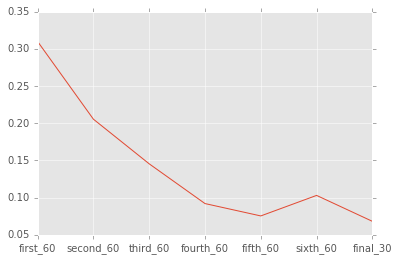

In [19]:
df_stats.loc[:,['first_60', 'second_60', 'third_60', 'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].mean().plot()

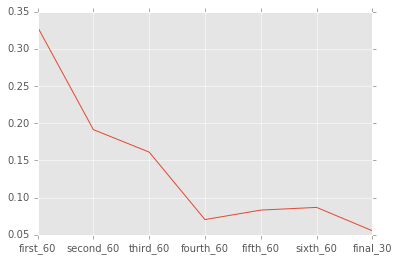

In [20]:
df_stats.loc[:,['first_60', 'second_60', 'third_60', 'fourth_60', 'fifth_60', 'sixth_60', 'final_30']].median().plot()

In [29]:
# one check before we dig in deeper
googl = get_prices_minutebar_from_ib(date_=datetime.datetime(2018, 1, 5, 16, 1, 0), 
                                    ticker_='GOOG', 
                                    whatToShow_='MIDPOINT', 
                                    how_many_weeks_=12)

Server Version: 76
TWS Time at connection:20180107 18:09:56 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

2017-11-17 16:01:00


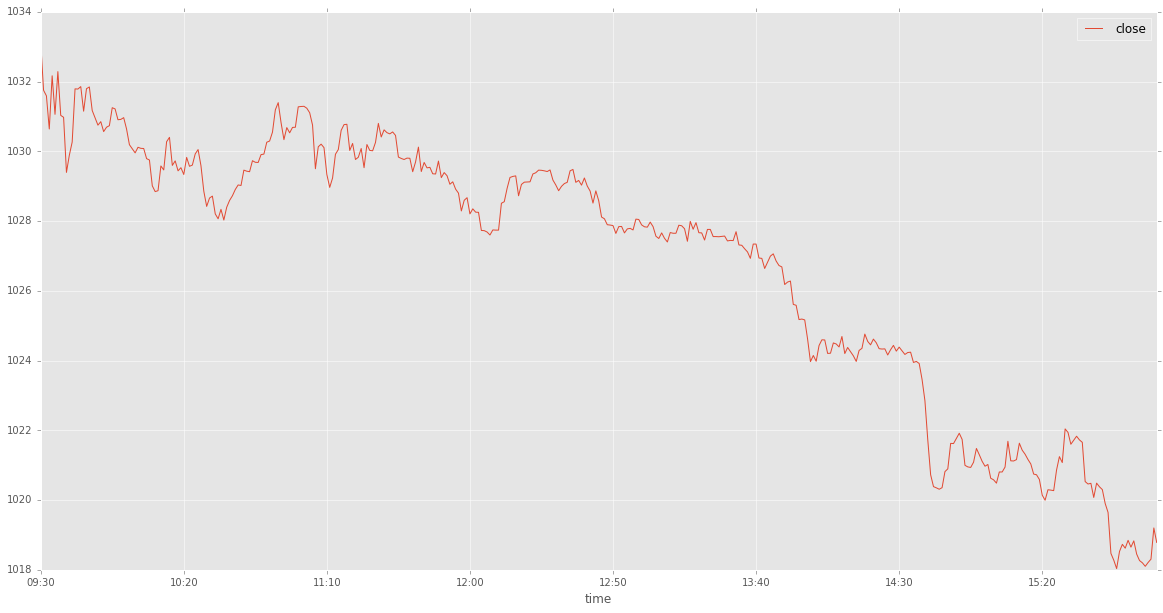

In [46]:
ind = 11
print googl.keys()[ind]
googl.values()[ind].plot(figsize = (20, 10))

In [19]:
print df_stats.loc[:, ['unique_strike_crosses', 'annual_var_first_60', 'annual_var_second_60']]

                    unique_strike_crosses annual_var_first_60  \
2017-10-20 16:01:00                     1         0.000258601   
2017-10-27 16:01:00                    14          0.00270108   
2017-11-03 16:01:00                     5         0.000482798   
2017-11-10 16:01:00                     2         0.000421494   
2017-11-17 16:01:00                     6         0.000558753   
2017-11-24 16:01:00                     2         0.000322949   
2017-12-01 16:01:00                     7         0.000972556   
2017-12-08 16:01:00                     4         0.000376161   
2017-12-15 16:01:00                     6         0.000500803   
2017-12-22 16:01:00                     1         0.000262589   
2017-12-29 16:01:00                     2         0.000363067   
2018-01-05 16:01:00                     4         0.000288927   

                    annual_var_second_60  
2017-10-20 16:01:00          5.53496e-05  
2017-10-27 16:01:00           0.00122491  
2017-11-03 16:01:00      

In [23]:
df_stats.unique_strike_crosses/df_stats.annual_var_first_60

2017-10-20 16:01:00    3866.97
2017-10-27 16:01:00    5183.11
2017-11-03 16:01:00    10356.3
2017-11-10 16:01:00    4745.02
2017-11-17 16:01:00    10738.2
2017-11-24 16:01:00    6192.92
2017-12-01 16:01:00    7197.53
2017-12-08 16:01:00    10633.7
2017-12-15 16:01:00    11980.7
2017-12-22 16:01:00    3808.24
2017-12-29 16:01:00    5508.63
2018-01-05 16:01:00    13844.3
dtype: object

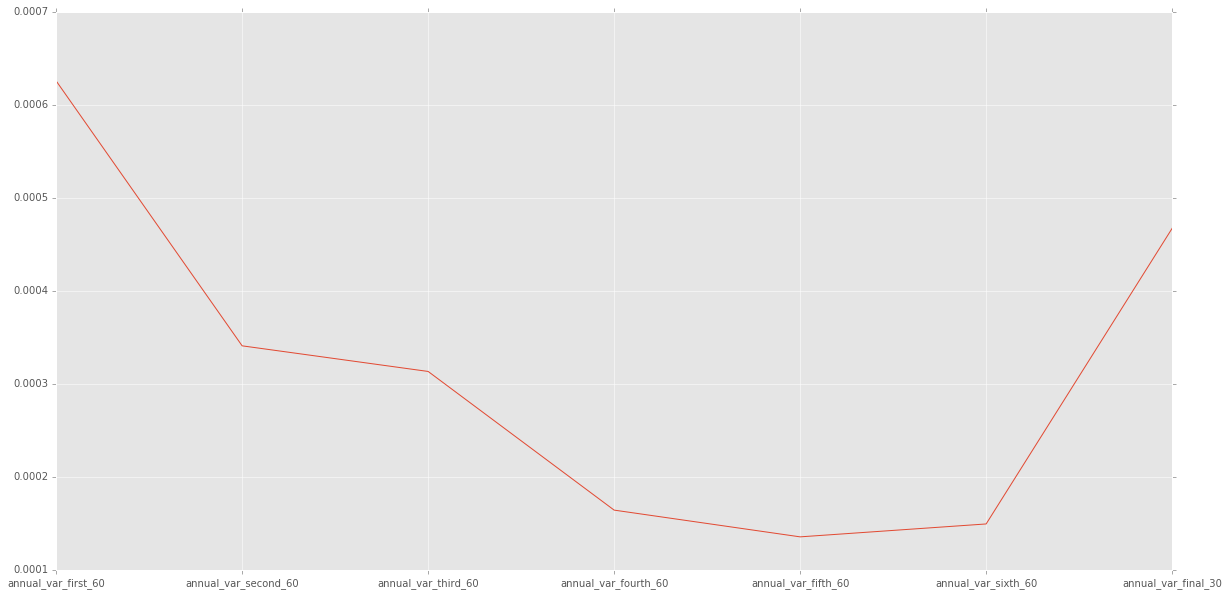

In [21]:
df_stats.loc[:,['annual_var_first_60', 'annual_var_second_60', 'annual_var_third_60', \
                                'annual_var_fourth_60', 'annual_var_fifth_60', 'annual_var_sixth_60', \
                                'annual_var_final_30']].mean(axis = 0).plot(figsize = (20, 10))

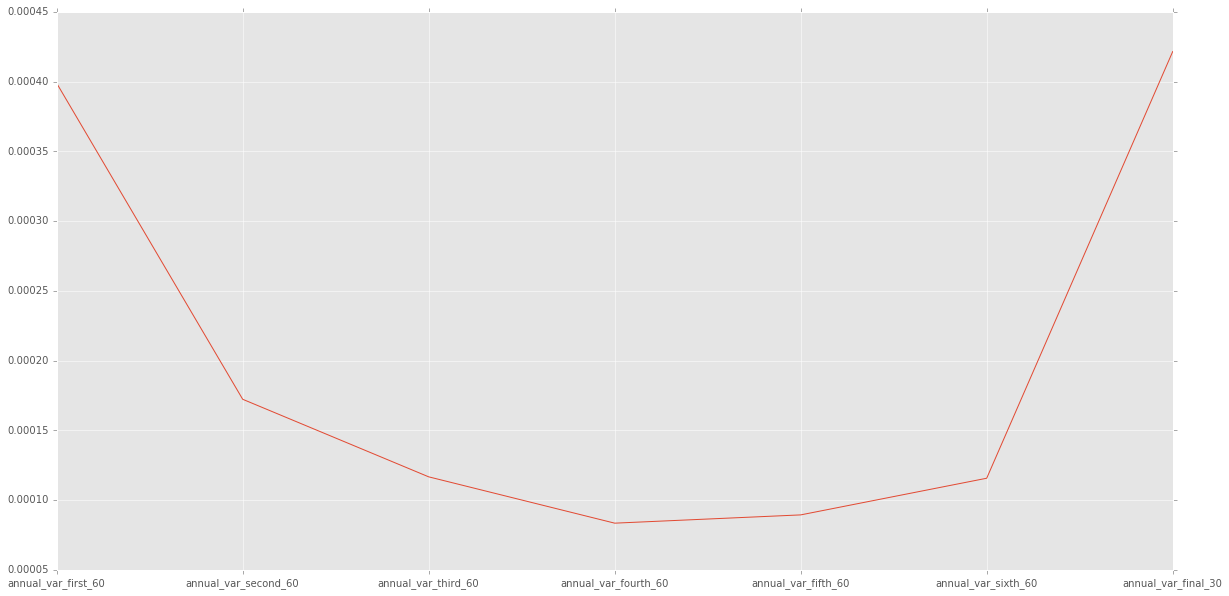

In [22]:
df_stats.loc[:,['annual_var_first_60', 'annual_var_second_60', 'annual_var_third_60', \
                                'annual_var_fourth_60', 'annual_var_fifth_60', 'annual_var_sixth_60', \
                                'annual_var_final_30']].median(axis = 0).plot(figsize = (20, 10))

In general, `GOOGL` shows a very similar behavior to `GOOG` and `AMZN`. And very in contrast to `TSLA` and `AAPL`. More often than not the stock moves away from the strike with high unique strike crosses (median is 4). There is little evidence of pinning. The best course of action is below

1. Around 10.30 to 11 one should take a long straddle position. Of course, if there is no evidence of pinning by that time. This could also be a little more defensive like a ratio. Generally, however, with median number of unique strike crosses, it is best to stay in the long straddle or start with it. 
2. If the stock shows the evidence of pinning we should close the position and trade the pinning with a short straddle or ratio or etc. For example, if buy 13.30-2.00  we are back at the strike we opened the position then we trade pinning. This is due to the very low percentage of strike crosses and unique strike crosses in the fifth_60, sixth_60 and final_30.
3. If the stock doesn't show pinning, we should stay in the position as long as possible, probably until 3.45. 

# BAC (Bank of America Corporation)

# GS (Goldman Sach Inc)

In [7]:
ticker_ = 'AAPL'
date_ = datetime.datetime(2018, 1, 5, 16, 1, 0) 
strikes_ = strikes
ib_whatToShow_ = 'MIDPOINT'
#
api_ = IB_PY()
cont = api_.make_contract(symbol = ticker_, secType = 'STK', currency = 'USD', exchange = 'SMART')
api_.get_historical_data(cont, barSizeSetting_= '1 min', 
                    durationStr_= '1 D', 
                    whatToShow_= ib_whatToShow_, 
                    endDateTime_= date_, 
                    sameContract_ = True)
df = api_.hist_data.copy(deep = True)
start_day_ = date_ - datetime.timedelta(hours = 6.5, minutes = 1)
df = df[pd.to_datetime(df['date']) >= start_day_]

Server Version: 76
TWS Time at connection:20180107 18:55:14 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

In [8]:
df.head()

WAP    close  count                date hasGaps     high      low  \
330 -1.0  173.190   -1.0 2018-01-05 09:30:00   False  173.500  173.170   
331 -1.0  173.770   -1.0 2018-01-05 09:31:00   False  173.780  173.085   
332 -1.0  173.720   -1.0 2018-01-05 09:32:00   False  173.845  173.715   
333 -1.0  173.785   -1.0 2018-01-05 09:33:00   False  173.985  173.680   
334 -1.0  173.725   -1.0 2018-01-05 09:34:00   False  173.825  173.565   

        open  volume whatToShow Ticker  
330  173.385    -1.0   MIDPOINT   AAPL  
331  173.190    -1.0   MIDPOINT   AAPL  
332  173.770    -1.0   MIDPOINT   AAPL  
333  173.720    -1.0   MIDPOINT   AAPL  
334  173.785    -1.0   MIDPOINT   AAPL

In [15]:
np.var(np.log(np.array(df.close.iloc[1:60])/np.array(df.close.iloc[:59]))) * 6.5 * 252 * 100

0.062200113145610206